In [22]:
import numpy as np
import matplotlib.pyplot as plt

import scipy.optimize
import scipy.sparse.linalg

from time import time

import pandas as pd

In [23]:
time_data_file = "time_data-32878045.csv"
ev_time_data_file = "eigenvector_time_data-(2).csv"

In [43]:
time_data_all = pd.read_csv(time_data_file)

#for k in range(1):
#    time_data_all = time_data_all.drop(k)

time_data_all["time_total"] =   time_data_all["time_k1"]+ \
                                time_data_all["time_k2"]+ \
                                time_data_all["time_common"]+ \
                                time_data_all["time_example"] +\
                                time_data_all["time_eig_k1"]+\
                                time_data_all["time_eig_k2"]

time_data_all = time_data_all[((time_data_all["n_pts"]-5000) % 25000 == 0) | (time_data_all["n_pts"] > 100000)]

##########################################################################
# PLOT 1
p1 = time_data_all.plot(x="n_pts", y=["time_total"],marker="x",linewidth=0,label=["Measured time at d=100"],figsize=(5,3.5), logy=False)

scaling = time_data_all["n_pts"]# * np.log(time_data_all["n_pts"])

def fun1(ab):
    return ab[1]*scaling*np.log(scaling/ab[0])/ab[0]+ab[2]
    #return ab[0]*(scaling/1000)**2+ab[1]*scaling/1000+ab[2]
def fun2(ab):
    return ab[1]/ab[0]*scaling*np.log(scaling)-ab[1]/ab[0]*scaling*np.log(ab[0])+ab[2]

# fit the log part
scaling_fit1 = scipy.optimize.minimize(lambda ab: np.linalg.norm(fun1(ab) - time_data_all["time_total"]), [10000,1,1])

print("fit", scaling_fit1.x.astype(np.int))

_a = scaling_fit1.x[1]/scaling_fit1.x[0]
_b = np.log(scaling_fit1.x[0]) * _a
_c = scaling_fit1.x[2]
print(f"actual function: {_a:.7f} N log(N) - {_b:.7f} N + {_c:.7f}")

def actual_function(N):
    return _a *N* np.log(N) - _b *N + _c

scaling_full = np.linspace(np.min(scaling), np.max(scaling), 100)
p1.plot(scaling_full, actual_function(scaling_full), 'k:', label=r"$O(N \log N)$")
p1.legend()
p1.set_xlabel("Number of points in the dataset")
p1.set_ylabel("Total seconds")
fig1 = plt.gcf()
fig1.savefig("efficiency_total_seconds.pdf")

fit [38303    51    26]
actual function: 0.0013455 N log(N) - 0.0141995 N + 26.9836555


fit [   1.           48.00461542 -907.70058889]


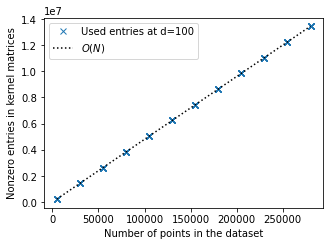

In [44]:
##########################################################################
# PLOT 2
time_data_all["mat_neighbors_per_row_total"] =   time_data_all["mat_neighbors_per_row_k1"]*time_data_all["n_pts"]+ \
                                time_data_all["mat_neighbors_per_row_k1"]*time_data_all["n_pts"]
p1 = time_data_all.plot(x="n_pts", y=["mat_neighbors_per_row_total"],linewidth=0,label=["Used entries at d=100"],marker="x", figsize=(5,3.5), logy=False)

scaling = time_data_all["n_pts"]

def fun(ab):
    return ab[0]*0*scaling**2+ab[1]*scaling+ab[2]
    
scaling_fit = scipy.optimize.minimize(lambda ab: np.linalg.norm(fun(ab) - time_data_all["mat_neighbors_per_row_total"]), [1,1,1])
print("fit", scaling_fit.x)

p1.plot(time_data_all["n_pts"], fun(scaling_fit.x), 'k:', label=r"$O(N)$")
p1.legend()
p1.set_xlabel("Number of points in the dataset")
p1.set_ylabel("Nonzero entries in kernel matrices")
fig1 = plt.gcf()
fig1.savefig("efficiency_total_memory.pdf")

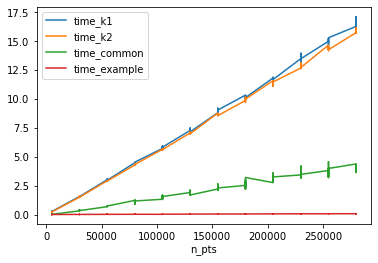

In [26]:
##########################################################################
# PLOT 3

p2 = time_data_all.plot(x="n_pts", y=["time_k1", "time_k2", "time_common",  "time_example"], logy=False)

fit [   1 -150]
actual function: 1.2945669 d + -150.0280786


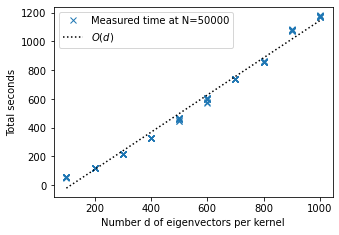

In [42]:
time_data_all = pd.read_csv(ev_time_data_file)

#for k in range(1):
#    time_data_all = time_data_all.drop(k)

time_data_all["time_total"] =   time_data_all["time_k1"]+ \
                                time_data_all["time_k2"]+ \
                                time_data_all["time_common"]+ \
                                time_data_all["time_example"] +\
                                time_data_all["time_eig_k1"]+\
                                time_data_all["time_eig_k2"]

#time_data_all = time_data_all[((time_data_all["n_pts"]-5000) % 25000 == 0) | (time_data_all["n_pts"] > 100000)]

##########################################################################
# PLOT 1
p1 = time_data_all.plot(x="n_kernel_evecs", y=["time_total"],marker="x",linewidth=0,label=["Measured time at N=50000"],figsize=(5,3.5), logy=False)

scaling = time_data_all["n_kernel_evecs"]# * np.log(time_data_all["n_pts"])

def fun1(ab):
    #return ab[1]*scaling*np.log(scaling/ab[0])/ab[0]+ab[2]
    return ab[0]*scaling+ab[1]

# fit the log part
scaling_fit1 = scipy.optimize.minimize(lambda ab: np.linalg.norm(fun1(ab) - time_data_all["time_total"]), [1,1])

print("fit", scaling_fit1.x.astype(np.int))

_a = scaling_fit1.x[0]
_c = scaling_fit1.x[1]
print(f"actual function: {_a:.7f} d + {_c:.7f}")

def actual_function(N):
    return _a *N+ _c

scaling_full = np.linspace(np.min(scaling), np.max(scaling), 100)
p1.plot(scaling_full, actual_function(scaling_full), 'k:', label=r"$O(d)$")
p1.legend()
p1.set_xlabel("Number d of eigenvectors per kernel")
p1.set_ylabel("Total seconds")
fig1 = plt.gcf()
fig1.savefig("efficiency_eigenvectors_seconds.pdf")

In [40]:
##########################################################################
# PLOT 2
time_data_all["mat_neighbors_per_row_total"] =   time_data_all["n_kernel_evecs"]*time_data_all["n_pts"]+ \
                                time_data_all["n_kernel_evecs"]*time_data_all["n_pts"]
p1 = time_data_all.plot(x="n_kernel_evecs", y=["mat_neighbors_per_row_total"],linewidth=0,label=["Entries at N=50000"],marker="x", figsize=(5,3.5), logy=False)

scaling = time_data_all["n_kernel_evecs"]

def fun(ab):
    return ab[1]*scaling+ab[2]
    
scaling_fit = scipy.optimize.minimize(lambda ab: np.linalg.norm(fun(ab) - time_data_all["mat_neighbors_per_row_total"]), [1,1,1])
print("fit", scaling_fit.x)

p1.plot(time_data_all["n_kernel_evecs"], fun(scaling_fit.x), 'k:', label=r"$O(d)$")
p1.legend()
p1.set_xlabel("Number d of eigenvectors per kernel")
p1.set_ylabel("Number of eigenvector entries")
fig1 = plt.gcf()
fig1.savefig("efficiency_eigenvectors_memory.pdf")

fit [ 1.00000000e+00  1.00000000e+05 -3.03372219e-06]
